In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk for natural language processing
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## Reading sentiment data in a dataframe

In [2]:
df = pd.read_csv('../data/Tamil_first_ready_for_sentiment.csv',sep='\t',header=None)
df.columns=["target","text"]
df

,target,text
0,Negative,Enna da ellam avan seyal Mari iruku
1,Negative,This movei is just like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...
3,Positive,Neraya neraya neraya... ... V era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...
...,...,...
15739,Mixed_feelings,ivaru cinemala laam nalla tha prasuraaru...aa...
15740,Positive,Pattaya Kilaputhupaa trailer... !!!!! Get Raj...
15741,Mixed_feelings,En innum trending la varala? Ennada panringa ...
15742,not-Tamil,Rajnikant sir plz aap india ke pm ban jaao


In [3]:
print('length of data is', len(df))

length of data is 15744


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  15744 non-null  object
 1   text    15744 non-null  object
dtypes: object(2)
memory usage: 246.1+ KB


In [5]:
df.dtypes

target    object
text      object
dtype: object

## chek for null values

In [6]:
np.sum(df.isnull().any(axis=1))

0

## Number of target or classes in the dataset

In [7]:
df['target'].unique()

array(['Negative ', 'Positive ', 'Mixed_feelings ', 'not-Tamil ',
       'unknown_state '], dtype=object)

## Distribution of target labels in the dataset

<AxesSubplot:xlabel='target', ylabel='count'>

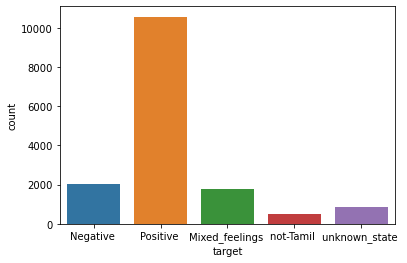

In [8]:
import seaborn as sns
sns.countplot(x='target', data=df)

# Preprocessing the text data before feeding it to ML model

## Removing punctuations

In [9]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

15739     ivaru cinemala laam nalla tha prasuraaruaana ...
15740        Pattaya Kilaputhupaa trailer  Get Rajnified  
15741     En innum trending la varala Ennada panringa Y...
15742           Rajnikant sir plz aap india ke pm ban jaao
15743     Enagada YouTube inum trending la add panama i...
Name: text, dtype: object

## Removing any numbers from the text

In [10]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

15739     ivaru cinemala laam nalla tha prasuraaruaana ...
15740        Pattaya Kilaputhupaa trailer  Get Rajnified  
15741     En innum trending la varala Ennada panringa Y...
15742           Rajnikant sir plz aap india ke pm ban jaao
15743     Enagada YouTube inum trending la add panama i...
Name: text, dtype: object

## convert tamil text to English

In [11]:
from googletrans import Translator
translator = Translator()

## convertTamiltoEnglish utility function to translate tamil tweets to English

In [12]:
import time
def convertTamiltoEnglish(tm):
    #time.sleep(0.2)
    return translator.translate(tm, src='ta', dest='en').text

## using final result of the transaltion

In [13]:
final_df=pd.read_csv("../data/tamiltoEnglish.csv",sep=",",header=0)
final_df

,id,tamil,english
0,0,Enna da ellam avan seyal Mari iruku',"""What's up, his actions have changed"""
1,1,This movei is just like ellam avan seyal',This Moai Is Just Like is all his doing'
2,2,Padam vanthathum k dislike pottavaga yellam y...,"When the film comes out, we will put everythin..."
3,3,Neraya neraya neraya V era levelthala',Approximate Approximate Throwing Level'
4,4,wow thavala sema masspadam oru pundaikum aaga...,Wow Davala sema mashapadam is not a bad thing'
...,...,...,...
15739,15739,ivaru cinemala laam nalla tha prasuraaruaana ...,He is very famous in cinema and shines in real...
15740,15740,Pattaya Kilaputhupaa trailer Get Rajnified ',Pattaya Clubduppa Trailer Get Rajinikanth'
15741,15741,En innum trending la varala Ennada panringa Y...,"I'm not trending yet, YouTube Bellows'"
15742,15742,Rajnikant sir plz aap india ke pm ban jaao',Rajinikanth sir plz of india k bin bhang jao'


## Making statement text in lower case

In [14]:
final_df['english']=final_df['english'].str.lower()
final_df['english'].tail()

15739    he is very famous in cinema and shines in real...
15740           pattaya clubduppa trailer get rajinikanth'
15741               i'm not trending yet, youtube bellows'
15742        rajinikanth sir plz of india k bin bhang jao'
15743                   you are still trending on youtube'
Name: english, dtype: object

In [15]:
## Stopwrods are generally not useful for the task. Hence, they need to be removed, ex: a, the, it...

In [16]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwordlist=stopwords.words('english')

## Removing stopwrods from the data

In [17]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
final_df['english'] = final_df['english'].apply(lambda text: cleaning_stopwords(text))
final_df['english'].head()

0                      "what's up, actions changed"
1                                  moai like doing'
2    film comes out, put everything disc put disc.'
3           approximate approximate throwing level'
4             wow davala sema mashapadam bad thing'
Name: english, dtype: object

## Removing punctuations

In [18]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
final_df['english']= final_df['english'].apply(lambda x: cleaning_punctuations(x))
final_df['english'].tail()

15739               famous cinema shines real life
15740    pattaya clubduppa trailer get rajinikanth
15741              im trending yet youtube bellows
15742    rajinikanth sir plz india k bin bhang jao
15743                       still trending youtube
Name: english, dtype: object

## Removing any numbers from the text

In [19]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
final_df['english'] = final_df['english'].apply(lambda x: cleaning_numbers(x))
final_df['english'].tail()

15739               famous cinema shines real life
15740    pattaya clubduppa trailer get rajinikanth
15741              im trending yet youtube bellows
15742    rajinikanth sir plz india k bin bhang jao
15743                       still trending youtube
Name: english, dtype: object

## tokenization of tweet text

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
final_df['english']=final_df['english'].apply(tokenizer.tokenize)
final_df['english'].head()

0                        [whats, up, actions, changed]
1                                  [moai, like, doing]
2    [film, comes, out, put, everything, disc, put,...
3          [approximate, approximate, throwing, level]
4          [wow, davala, sema, mashapadam, bad, thing]
Name: english, dtype: object

In [21]:
final_df

,id,tamil,english
0,0,Enna da ellam avan seyal Mari iruku',"[whats, up, actions, changed]"
1,1,This movei is just like ellam avan seyal',"[moai, like, doing]"
2,2,Padam vanthathum k dislike pottavaga yellam y...,"[film, comes, out, put, everything, disc, put,..."
3,3,Neraya neraya neraya V era levelthala',"[approximate, approximate, throwing, level]"
4,4,wow thavala sema masspadam oru pundaikum aaga...,"[wow, davala, sema, mashapadam, bad, thing]"
...,...,...,...
15739,15739,ivaru cinemala laam nalla tha prasuraaruaana ...,"[famous, cinema, shines, real, life]"
15740,15740,Pattaya Kilaputhupaa trailer Get Rajnified ',"[pattaya, clubduppa, trailer, get, rajinikanth]"
15741,15741,En innum trending la varala Ennada panringa Y...,"[im, trending, yet, youtube, bellows]"
15742,15742,Rajnikant sir plz aap india ke pm ban jaao',"[rajinikanth, sir, plz, india, k, bin, bhang, ..."


## Applying Stemming: Reducing a word to its stem

In [22]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
final_df['english']= final_df['english'].apply(lambda x: stemming_on_text(x))
final_df['english'].head()

0                        [whats, up, actions, changed]
1                                  [moai, like, doing]
2    [film, comes, out, put, everything, disc, put,...
3          [approximate, approximate, throwing, level]
4          [wow, davala, sema, mashapadam, bad, thing]
Name: english, dtype: object

## Lemmatization considers the context and converts the word to its meaningful base form

In [23]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
final_df['english'] = final_df['english'].apply(lambda x: lemmatizer_on_text(x))
final_df['english'].head()

0                        [whats, up, actions, changed]
1                                  [moai, like, doing]
2    [film, comes, out, put, everything, disc, put,...
3          [approximate, approximate, throwing, level]
4          [wow, davala, sema, mashapadam, bad, thing]
Name: english, dtype: object

In [24]:
final_df=final_df.reset_index(drop=True)
final_df

,id,tamil,english
0,0,Enna da ellam avan seyal Mari iruku',"[whats, up, actions, changed]"
1,1,This movei is just like ellam avan seyal',"[moai, like, doing]"
2,2,Padam vanthathum k dislike pottavaga yellam y...,"[film, comes, out, put, everything, disc, put,..."
3,3,Neraya neraya neraya V era levelthala',"[approximate, approximate, throwing, level]"
4,4,wow thavala sema masspadam oru pundaikum aaga...,"[wow, davala, sema, mashapadam, bad, thing]"
...,...,...,...
15739,15739,ivaru cinemala laam nalla tha prasuraaruaana ...,"[famous, cinema, shines, real, life]"
15740,15740,Pattaya Kilaputhupaa trailer Get Rajnified ',"[pattaya, clubduppa, trailer, get, rajinikanth]"
15741,15741,En innum trending la varala Ennada panringa Y...,"[im, trending, yet, youtube, bellows]"
15742,15742,Rajnikant sir plz aap india ke pm ban jaao',"[rajinikanth, sir, plz, india, k, bin, bhang, ..."


In [25]:
df_concat = pd.concat([df,final_df],axis=1)
df_concat=df_concat[["target","tamil","english"]]
df_concat

,target,tamil,english
0,Negative,Enna da ellam avan seyal Mari iruku',"[whats, up, actions, changed]"
1,Negative,This movei is just like ellam avan seyal',"[moai, like, doing]"
2,Positive,Padam vanthathum k dislike pottavaga yellam y...,"[film, comes, out, put, everything, disc, put,..."
3,Positive,Neraya neraya neraya V era levelthala',"[approximate, approximate, throwing, level]"
4,Positive,wow thavala sema masspadam oru pundaikum aaga...,"[wow, davala, sema, mashapadam, bad, thing]"
...,...,...,...
15739,Mixed_feelings,ivaru cinemala laam nalla tha prasuraaruaana ...,"[famous, cinema, shines, real, life]"
15740,Positive,Pattaya Kilaputhupaa trailer Get Rajnified ',"[pattaya, clubduppa, trailer, get, rajinikanth]"
15741,Mixed_feelings,En innum trending la varala Ennada panringa Y...,"[im, trending, yet, youtube, bellows]"
15742,not-Tamil,Rajnikant sir plz aap india ke pm ban jaao',"[rajinikanth, sir, plz, india, k, bin, bhang, ..."


In [26]:
df_pos=df_concat.loc[df_concat["target"]=="Positive "]
df_pos

,target,tamil,english
2,Positive,Padam vanthathum k dislike pottavaga yellam y...,"[film, comes, out, put, everything, disc, put,..."
3,Positive,Neraya neraya neraya V era levelthala',"[approximate, approximate, throwing, level]"
4,Positive,wow thavala sema masspadam oru pundaikum aaga...,"[wow, davala, sema, mashapadam, bad, thing]"
6,Positive,Yaarellam frst like pottutu video paaka start...,"[anyone, start, watching, video, giving, first..."
7,Positive,Ethana padam vanthanu SALT AND PEPPER Mattum ...,"[ethana, padam, vanthanu, salt, pepper, mattum..."
...,...,...,...
15732,Positive,Looking young rajini Anna Fans from Telangana',"[looking, ng, rajini, anna, pals, frame, telan..."
15733,Positive,Nee vaa thalaivaa ponggalukku naaga erukko',"[come, leader, pongal]"
15735,Positive,Rajini sir god of Indian cenima thalivaaaaaa ...,"[rajini, sir, code, op, indian, cinema, thalai..."
15738,Positive,Again rajni sir cute look',"[look, rajini, sir]"


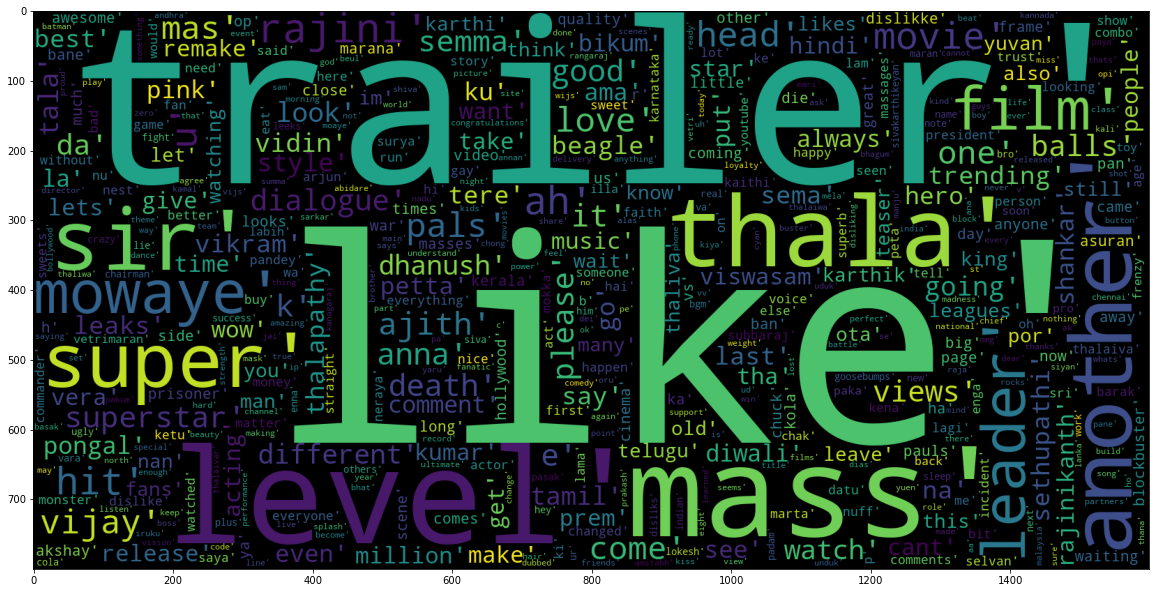

In [27]:
data_pos = df_concat['english']
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
              collocations=False).generate("".join(data_pos.astype(str).replace("'","")))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [28]:
X=df_concat.english
y=df_concat.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =12312)

In [30]:
X_train=X_train.astype(str)
X_train

4467     ['please', 'make', 'mari', 'film', 'go', 'shiva']
8422                        ['change', 'style', 'leaders']
1031     ['zee', 'tamil', 'new', 'drama', 'starring', '...
5082     ['apo', 'pasha', 'ipo', 'petta', 'chief', 'dea...
51                      ['let', 'young', 'person', 'warm']
                               ...                        
14995    ['rajini', 'na', 'masta', 'ajithana', 'luceda'...
2184     ['rajini', 'superstar', 'nest', 'chim', 'pe', ...
7002     ['super', 'power', 'mahinda', 'logic', 'ah', '...
7427     ['love', 'u', 'dhanush', 'anna', 'semma', 'mas...
709                       ['suyinply', 'another', 'level']
Name: english, Length: 11020, dtype: object

In [31]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  52288


In [32]:
X_train = vectoriser.transform(X_train)
#X_test  = vectoriser.transform(X_test.astype(str))

In [33]:
X_test=X_test.astype(str)
X_test

14038    ['show', 'faith', 'one', 'another', 'lie', 'wo...
14780    ['katupenevaru', 'level', 'matter', 'guarding'...
12623              ['think', 'mowaye', 'another', 'level']
9399     ['would', 'better', 'bad', 'ortus', 'like', 'n...
8972                                   ['trailer', 'mass']
                               ...                        
10993                  ['kind', 'close', 'close', 'close']
10790    ['vijay', 'sir', 'ur', 'vellam', 'sa', 'gaye',...
1520             ['ajit', 'ali', 'bunda', 'mavan', 'shed']
2515                           ['welcome', 'join', 'club']
1093                              ['crow', 'fan', 'chick']
Name: english, Length: 4724, dtype: object

In [34]:
X_test  = vectoriser.transform(X_test.astype(str))

In [35]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

##  target dependent variable have more than two classes i.e. multiclass

In [36]:
LRmodel = LogisticRegression(multi_class='multinomial',  max_iter = 2000,solver='lbfgs', penalty='l2', C=1.0)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

                 precision    recall  f1-score   support

Mixed_feelings        0.33      0.01      0.02       555
      Negative        0.31      0.06      0.10       595
      Positive        0.69      0.98      0.81      3160
     not-Tamil        0.75      0.29      0.42       167
 unknown_state        0.26      0.04      0.08       247

       accuracy                           0.67      4724
      macro avg       0.47      0.27      0.28      4724
   weighted avg       0.58      0.67      0.57      4724

